# Euler's method

- toc: false
- branch: master
- badges: true
- comments: false
- categories: [mathematics, numerical recipes]
- hide: true

# 📐 Euler's method 📐

-------
Questions:
- How do I use Euler's method to solve a first-order ODE?



--------



---------
Objectives:
- Use Euler's method, implemented in Python, to solve a first-order ODE
- Understand that this method is approximate and the significance of step size $h$
- Compare results at different levels of approximation using the `matplotlib` library.
------

### There are a variety of ways to solve an ODE

In the previous lesson we considered nuclear decay:

\begin{equation}
\frac{d N}{d t} = -\lambda N
\end{equation}

This is one of the simplest examples of am ODE - a first-order, linear, separable differential equation with one dependent variable. We saw that we could model the number of atoms $N$ by finding an analytic solution through integration:

\\begin{equation}
N = N_0 e^{-\lambda t}
\end{equation}

However there is more than one way to crack an egg (or solve a differential equation). We could have, instead, used an approximate, numerical method.

### Computers don't care whether a differential equation is linear or non-linear

Many of the equations we are interested in are not so friendly. 

For example, the Lotka-Volterra equations for studying predator-prey interactions have multiple dependent variables and the Cahn-Hilliard equation for modelling phase separation in fluids is non-linear. These equations can be solved analytically for particular, special cases only.

Computers don't care whether an equation is linear or non-linear, the numerical method for studying it is the same - with the caveat that numerical methods are approximate and so we need to think about the accuracy of the methods used.

### A function can be approximated using a Taylor expansion

Let's return to our example of nuclear decay:

\begin{equation}
\frac{dN}{dt} = f(N,t),
\end{equation}

where 

\begin{equation}
f(N,t) = -\lambda N.
\end{equation}

We can use a <nark>Taylor expansion</mark> to write the value of $N$ a short interval $h$ later:

\begin{equation}
N(t+h) = N(t) + h\frac{dN}{dt} + \frac{1}{2}h^2\frac{d^2N}{dt^2} + \ldots
\end{equation}

\begin{equation}
N(t+h) = N(t) + hf(N,t) + \mathcal{O}(h^2)
\end{equation}

*If you have forgotten what a Taylor expansion is, there is a lovely video explanation below from user `3blue1brown` on Youtube:*

> youtube: https://www.youtube.com/watch?v=3d6DsjIBzJ4

### If the step size $h$ is small then higher  order terms can be neglected

If $h$ is small and $h^2$ is very small we can neglect the terms in $h^2$ and higher and we get:

\begin{equation}
N(t+h) = N(t) + hf(N,t).
\end{equation}



### Euler's method can be used to approximate the solution of differential equations

We can keep applying the equation above so that we calculate $N(t)$ at a succession of equally spaced points for as  long as we want. If $h$ is small enough we can get a good approximation to the solution of the equation. This method for solving differential equations is called Euler's method, after Leonhard Euler, its inventor.

![](../images/Euler_method.png)

> Note: Although we are neglecting terms $h^2$ and higher, Euler's method has an error linear in $h$ as the error accumulates over repeated steps. This means that if we want to double the accuracy of our calculation we need to double the number of steps, and double the calcuation time.

> Note: So far we have looked at an example where the input (or independent variable) is time. This isn't always the case - but it is the most common case in physics, as we are often interested in how things evolve with time.

### Euler's method can be applied using the Python skills we have developed

Let's use Euler's method to solve the differential equation for nuclear decay. We will model the decay process over a period of 10 seconds, with the decay constant $\lambda=0.1$ and the initial condition $N_0 = 1000$.

\begin{equation}
\frac{d N}{d t} = -0.1 N
\end{equation}


First, let's import the standard scientific libraries we will be using - Numpy and  Matplotlib:

In [38]:
import numpy as np
import matplotlib.pyplot as plt

Let's definte the function $f(N,t)$ which describes the rate of decay. In this case, the function depends only on the number of atoms present.

In [39]:
# define the function for nuclear decay
def f(Num_atoms):
    return -0.1*Num_atoms

Next we'll list the simulation parameters and initial conditions: start time, end time, number of starting atoms (which is an initial condition), number of time steps and step size (which is calculated using the number of time steps).

In [40]:
a = 0                  # start time
b = 10                 # end time
Num_atoms = 1000       # initial condition
num_steps = 5         # number of time steps
h = (b-a) / num_steps  # time step size

We use the Numpy `arange` function to generate a list of evenly spaced times at which to evaluate the number of atoms. We also create  an empty list to hold the values for $N$ that we are yet to calculate.

In [41]:
# use the Numpy arange function to generate a list of evenly spaced times at which to evaluate the number of atoms N.
time_list = np.arange(a,b,h)

# create an empty list to hold the calculated N values
Num_atoms_list = []

Finally, we apply Euler's method using a `For` loop. Note that the order of operations in the loop body is important.

In [42]:
# apply Euler's method. Note that the order of operations in the loop body is important.
for time in time_list:
    Num_atoms_list.append(Num_atoms)
    Num_atoms += h*f(Num_atoms)

### We can easily visualise our results, and compare against the analytical solution, using the `matplotlib` plotting library

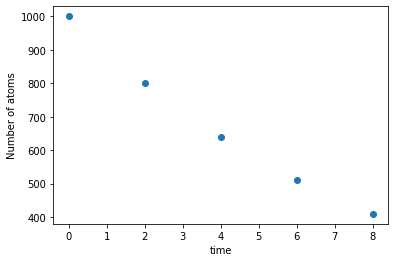

In [43]:
plt.scatter(time_list, Num_atoms_list)
plt.xlabel("time")
plt.ylabel("Number of atoms")
plt.show()

Using the analytic solution from the previous lesson, we can define a function for calculating the number of atoms $N$ as a function of time (this is the exact solution).

In [44]:
def analytic_solution(time):
    return 1000*np.exp(-0.1*time)

We can use this to calculate the exact value for $N$ over the full time range. Note that we use a large number of points in time (in this case 1000) to give a nice smooth curve:

In [45]:
num_steps = 1000
h = (b-a) / num_steps
time_analytic_list = np.arange(a,b,h)
Num_atoms_analytic_list = []

for time in time_analytic_list:
    Num_atoms_analytic_list.append(analytic_solution(time))

Finally, we plot the approximate Euler method results against the exact analytical solution:

Text(0, 0.5, 'Number of atoms')

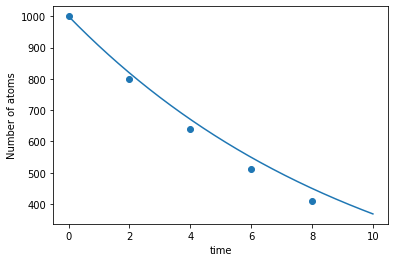

In [46]:
plt.plot(time_analytic_list,Num_atoms_analytic_list)
plt.scatter(time_list, Num_atoms_list)
plt.xlabel("time")
plt.ylabel("Number of atoms")

----

Keypoints:

- There are a variety of ways to solve an ODE
- Computers don't care whether a differential equation is linear or non-linear
- A function can be approximated using a Taylor expansion
- If the step size $h$ is small then higher  order terms can be neglected
- Euler's method can be used to approximate the solution of differential equations
- Euler's method can be applied using the Python skills we have developed
- We can easily visualise our results, and compare against the analytical solution, using the matplotlib plotting library
-----

---

Do [the quick-test](https://nu-cem.github.io/CompPhys/2021/08/02/Eulers-Method-Qs.html).

Back to [Modelling with Ordinary Differential Equations](https://nu-cem.github.io/CompPhys/2021/08/02/ODEs.html).

---

In [35]:
time_analytic_list

array([0])